In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import os

In [2]:
df = pd.read_csv('../heart_disease_raw/heart.csv')
print(f"Dataset loaded: {df.shape}")
df.head()

Dataset loaded: (918, 12)


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


Missing values:
 Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

Jumlah 0 di Cholesterol: 172


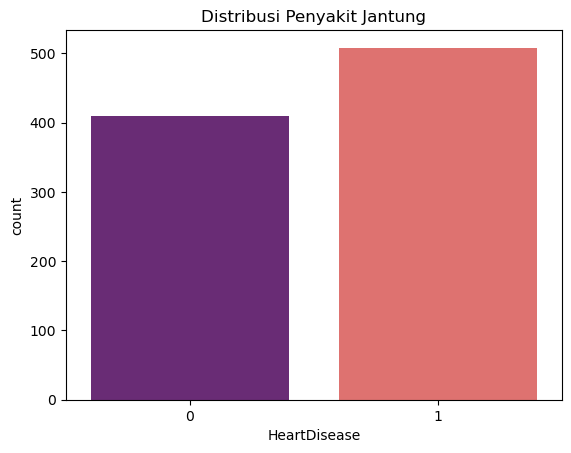

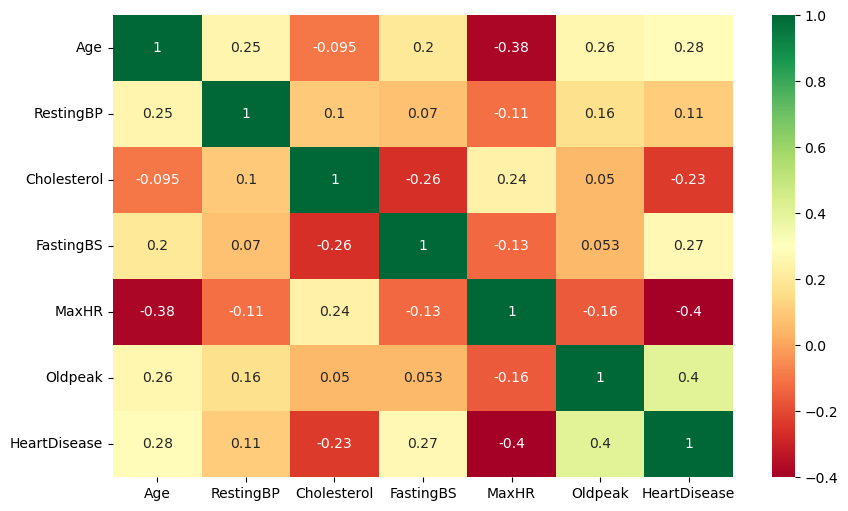

In [3]:
print("Missing values:\n", df.isnull().sum())
print("\nJumlah 0 di Cholesterol:", (df['Cholesterol'] == 0).sum())

sns.countplot(x='HeartDisease', data=df, palette='magma')
plt.title('Distribusi Penyakit Jantung')
plt.show()

plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), annot=True, cmap='RdYlGn')
plt.show()

In [4]:
df_clean = df.copy()

df_clean['Cholesterol'] = df_clean['Cholesterol'].replace(0, df_clean['Cholesterol'].median())
df_clean['RestingBP'] = df_clean['RestingBP'].replace(0, df_clean['RestingBP'].median())

le = LabelEncoder()
cat_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
for col in cat_cols:
    df_clean[col] = le.fit_transform(df_clean[col])

os.makedirs('heart_disease_preprocessing', exist_ok=True)
df_clean.to_csv('heart_disease_preprocessing/heart_clean.csv', index=False)
print("Preprocessing Berhasil & Data disimpan!")

Preprocessing Berhasil & Data disimpan!
